In [ ]:
#학번: 20901     이름: 경승민

In [ ]:
# 파일 선택 창을 통해 파일을 불러오기
from google.colab import files
filename = list(files.upload( ).keys( ))[0] # 'filename'이라는 변수에 파일 저장

Saving Student_Marks.csv to Student_Marks.csv


In [ ]:
#판다스 모듈 불러와서 파일 읽어 들이기
import pandas as pd
s_data = pd.read_csv(filename)

s_data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
# info( ) 메소드를 통해 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 타입 등 확인
s_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
# describe( ) 메소드를 통해 데이터 개수, 평균, 표준편차, 최솟값, 최댓값, 4분위수 파악
s_data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [ ]:
# 상관관계(correlation) 분석

s_corr = s_data.corr( )
s_corr

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


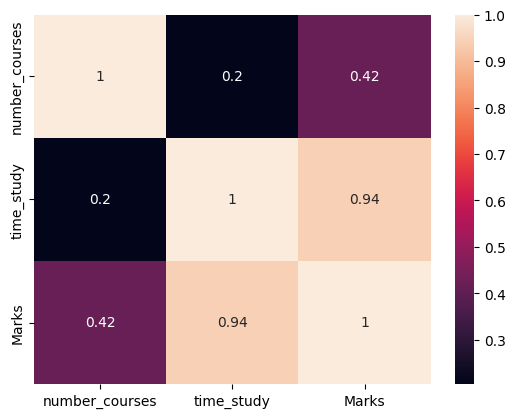

In [ ]:
# 시본 라이브러리를 이용해 결과를 히트맵으로 그리기
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(s_corr, annot = True) # 히트맵에 값 포함하여 그리기
plt.show( )

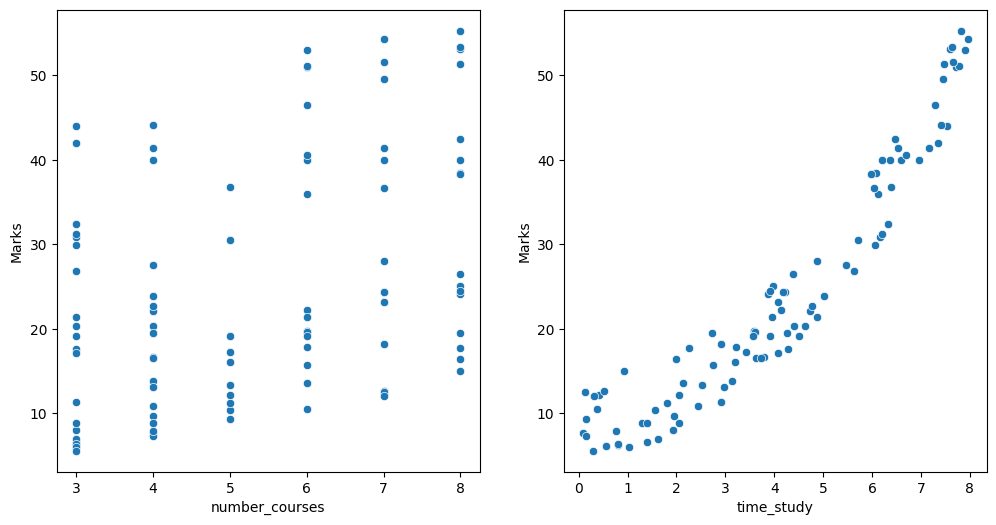

In [ ]:
# 여러 개 그래프 그리기
fig, ax = plt.subplots(ncols = 2, figsize = (12, 6))
sns.scatterplot(data = s_data, x = 'number_courses' , y = 'Marks', ax = ax[0])
sns.scatterplot(data = s_data, x = 'time_study', y = 'Marks', ax = ax[1])
plt.show( )

In [ ]:
from sklearn.model_selection import train_test_split
x = s_data[['number_courses', 'time_study']]
y = s_data['Marks']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()   # Linear Regression 모델 생성

In [ ]:
# Linear Regression 모델 학습
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr_pred = lr_model.predict(X_test)

r_score = r2_score(y_test, lr_pred)
print(f'r_score: {r_score:.2f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, lr_pred) :.2f}')

# print(f'r_score: {  :.2f}')
# print(f'Mean Squared Error: { :.2f}')

r_score: 0.95
Mean Squared Error: 14.20


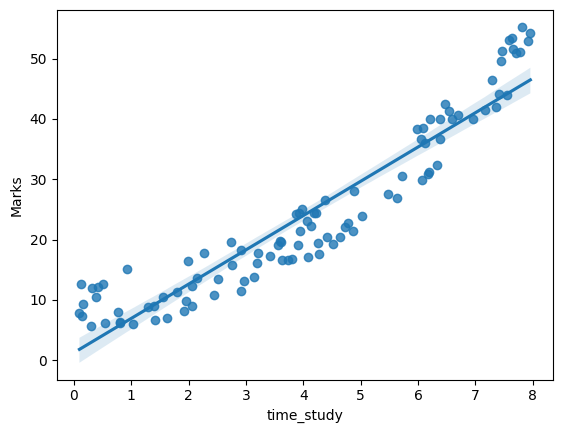

In [ ]:
# 회귀선 그리기
sns.regplot(x = s_data['time_study'], y = s_data['Marks'])
plt.show( )

In [ ]:
# 회귀식 구하기
print(f'Number of Course: {lr_model.coef_[0] :.2f}')   # 가중치(x1의 계수)
print(f'Hours Studying per Day: {lr_model.coef_[1] :.2f}') # 가중치(x2의 계수)
print(f'Intercept: {lr_model.intercept_ :.2f}',end='\n\n')  # 절편
print(f'회귀식 y = {lr_model.coef_[0]:.2f} x1 + {lr_model.coef_[1]:.2f} x2  {lr_model.intercept_:.2f}')

Number of Course: 1.87
Hours Studying per Day: 5.17
Intercept: -6.61

회귀식 y = 1.87 x1 + 5.17 x2  -6.61


In [ ]:
print(f'Accuracy: {(lr_model.score(X_test, y_test)*100):.2f}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, lr_pred):.2f}')

Accuracy: 94.60%
Mean Squared Error: 14.20


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()  # knn 회귀 모델
knn_model.fit(X_train, y_train)    # knn 회귀 모델 학습
knn_pred = knn_model.predict(X_test)   # knn 회귀 모델 예측
print(f'r2_score: {r2_score(knn_pred, y_test):.2f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, knn_pred):.2f}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()  # knn 회귀 모델
rf_model.fit(X_train, y_train)  # knn 회귀 모델 학습
rf_pred = rf_model.predict(X_test)   # knn 회귀 모델 예측
print(f'r2_score: {r2_score(rf_pred, y_test):.2f}')
print(f'Mean Squared Error: {mean_squared_error(rf_pred, y_test):.2f}')

In [ ]:
# 자신의 과목수와 공부한 시간 입력하여 시험 점수를 예측해 본다.
# 점수는 60점 만점으로 가정한다.
과목수 = 10
시간 = 10
예상점수 = 1.87 * 과목수 + 5.17 * 시간 -6.61
print(f'예상 점수: {예상점수:.2f}')
환산점수 = 100/60 * 예상점수
print(f'환산 점수: {환산점수:.2f}')